# 📊 NVIDIA Stock Market Analysis: Multi-Timeframe Deep Dive
## Complete Technical Analysis from 1999 to 2025

![NVIDIA Stock Analysis](https://images.unsplash.com/photo-1611974789855-9c2a0a7236a3?w=1200&h=300&fit=crop)

### 🎯 Analysis Overview
This comprehensive analysis covers **26 years** of NVIDIA stock data across **5 different timeframes**:

| Timeframe | Records | Date Range | Use Case |
|-----------|---------|------------|----------|
| 1 Second | 1,108 | Oct 2025 (2 days) | High-frequency trading, intraday patterns |
| 1 Hour | 1,967 | Apr-Oct 2025 (6 months) | Day trading, short-term trends |
| Daily | 922 | 2022-2025 (3.7 years) | Swing trading, medium-term analysis |
| Weekly | 922 | 2008-2025 (17 years) | Position trading, long-term trends |
| Monthly | 322 | 1999-2025 (26 years) | Investment analysis, macro trends |

### 📈 What You'll Learn:
✅ Multi-timeframe price action analysis  
✅ Volume patterns and liquidity insights  
✅ Technical indicators (SMA, EMA, RSI, Bollinger Bands)  
✅ Volatility and risk metrics  
✅ Historical performance analysis  
✅ Trading opportunities identification  

---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 11
sns.set_palette('Set2')

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("="*80)
print("📊 NVIDIA Stock Analysis Toolkit Loaded")
print(f"Analysis Date: {datetime.now().strftime('%B %d, %Y at %H:%M:%S')}")
print("="*80)

📊 NVIDIA Stock Analysis Toolkit Loaded
Analysis Date: October 08, 2025 at 14:57:49


## 📌 Section 1: Data Loading & Initial Exploration
### Loading all 5 timeframe datasets

In [2]:
# Load all datasets
print("\n📥 Loading NVIDIA Stock Data...\n")

datasets = {
    '1_Second': '/kaggle/input/nvidia/nvidia_1second.csv',
    'Hourly': '/kaggle/input/nvidia/nvidia_hourly.csv',
    'Daily': '/kaggle/input/nvidia/nvidia_daily.csv',
    'Weekly': '/kaggle/input/nvidia/nvidia_weekly.csv',
    'Monthly': '/kaggle/input/nvidia/nvidia_monthly.csv'
}

data = {}
for name, file in datasets.items():
    df = pd.read_csv(file)
    
    # Convert time to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Drop empty Plot columns
    df = df[['time', 'open', 'high', 'low', 'close']]
    
    # Sort by time
    df = df.sort_values('time').reset_index(drop=True)
    
    data[name] = df
    print(f"✅ {name:12s}: {len(df):>6,} rows | {df['time'].min().strftime('%Y-%m-%d')} to {df['time'].max().strftime('%Y-%m-%d')}")

print(f"\n✅ Total data points: {sum(len(df) for df in data.values()):,}")
print(f"✅ Memory usage: {sum(df.memory_usage(deep=True).sum() for df in data.values()) / 1024**2:.2f} MB")


📥 Loading NVIDIA Stock Data...

✅ 1_Second    :  1,108 rows | 2025-10-07 to 2025-10-08
✅ Hourly      :  1,967 rows | 2025-04-11 to 2025-10-08
✅ Daily       :    922 rows | 2022-02-03 to 2025-10-07
✅ Weekly      :    922 rows | 2008-02-11 to 2025-10-06
✅ Monthly     :    322 rows | 1999-01-01 to 2025-10-01

✅ Total data points: 5,241
✅ Memory usage: 0.20 MB


In [3]:
# Quick peek at each dataset
print("\n📋 DATASET PREVIEW\n" + "="*80)

for name, df in data.items():
    print(f"\n{name} Data:")
    print(df.head(3).to_string(index=False))
    print(f"\nShape: {df.shape} | Missing: {df.isnull().sum().sum()}")
    print("-"*80)


📋 DATASET PREVIEW

1_Second Data:
                     time     open     high      low    close
2025-10-07 06:31:00-04:00 186.0700 186.0700 185.9100 185.9800
2025-10-07 06:32:00-04:00 186.0000 186.1000 186.0000 186.0700
2025-10-07 06:33:00-04:00 186.0900 186.0900 186.0200 186.0600

Shape: (1108, 5) | Missing: 0
--------------------------------------------------------------------------------

Hourly Data:
                     time     open     high      low    close
2025-04-11 07:00:00-04:00 108.8800 109.1500 108.0600 108.8600
2025-04-11 08:00:00-04:00 108.8700 109.6200 108.6600 108.7900
2025-04-11 09:00:00-04:00 108.7600 110.6900 107.8400 110.3900

Shape: (1967, 5) | Missing: 0
--------------------------------------------------------------------------------

Daily Data:
      time    open    high     low   close
2022-02-03 24.4580 25.0770 23.7800 23.9480
2022-02-04 23.9720 24.6350 23.6320 24.3190
2022-02-07 24.3720 25.1820 24.2020 24.7280

Shape: (922, 5) | Missing: 0
----------------

## 📌 Section 2: Statistical Summary
### Understanding price ranges and distributions

In [4]:
# Create comprehensive summary
summary_data = []

for name, df in data.items():
    summary = {
        'Timeframe': name,
        'Records': f"{len(df):,}",
        'Start Date': df['time'].min().strftime('%Y-%m-%d'),
        'End Date': df['time'].max().strftime('%Y-%m-%d'),
        'Duration (Days)': (df['time'].max() - df['time'].min()).days,
        'Min Price': f"${df['low'].min():.2f}",
        'Max Price': f"${df['high'].max():.2f}",
        'Current Price': f"${df['close'].iloc[-1]:.2f}",
        'Avg Price': f"${df['close'].mean():.2f}",
        'Price Change': f"{((df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0] * 100):.2f}%"
    }
    summary_data.append(summary)

summary_df = pd.DataFrame(summary_data)
print("\n📊 COMPREHENSIVE SUMMARY")
print("="*120)
print(summary_df.to_string(index=False))
print("="*120)


📊 COMPREHENSIVE SUMMARY
Timeframe Records Start Date   End Date  Duration (Days) Min Price Max Price Current Price Avg Price Price Change
 1_Second   1,108 2025-10-07 2025-10-08                1   $184.41   $189.06       $186.31   $186.00        0.18%
   Hourly   1,967 2025-04-11 2025-10-08              180    $95.04   $191.05       $186.33   $154.89       71.16%
    Daily     922 2022-02-03 2025-10-07             1342    $10.81   $191.05       $185.04    $73.65      672.67%
   Weekly     922 2008-02-11 2025-10-06             6447     $0.14   $191.05       $185.04    $18.35    33135.74%
  Monthly     322 1999-01-01 2025-10-01             9770     $0.03   $191.05       $185.04    $12.68   467367.51%


In [5]:
# Detailed statistics for each timeframe
print("\n📈 DETAILED STATISTICS BY TIMEFRAME\n")

for name, df in data.items():
    print(f"{name}:")
    print("="*80)
    print(df[['open', 'high', 'low', 'close']].describe().to_string())
    print("\n")


📈 DETAILED STATISTICS BY TIMEFRAME

1_Second:
           open      high       low     close
count 1108.0000 1108.0000 1108.0000 1108.0000
mean   186.0040  186.0614  185.9432  186.0018
std      0.7779    0.7939    0.7628    0.7784
min    184.5800  184.7600  184.4050  184.5500
25%    185.4675  185.5000  185.4000  185.4588
50%    186.0100  186.0500  185.9500  186.0000
75%    186.2500  186.2900  186.2100  186.2500
max    188.8900  189.0600  188.6700  188.8900


Hourly:
           open      high       low     close
count 1967.0000 1967.0000 1967.0000 1967.0000
mean   154.8746  155.3919  154.3440  154.8903
std     26.1641   26.1544   26.1493   26.1608
min     95.1700   95.8050   95.0400   95.1600
25%    135.4550  135.9650  135.0225  135.5000
50%    164.7600  165.0600  164.0700  164.8250
75%    177.1750  177.6150  176.5500  177.1625
max    189.9500  191.0500  189.6100  189.9400


Daily:
          open     high      low    close
count 922.0000 922.0000 922.0000 922.0000
mean   73.6222  74.909

## 📌 Section 3: Price Visualization
### Visualizing price movements across all timeframes

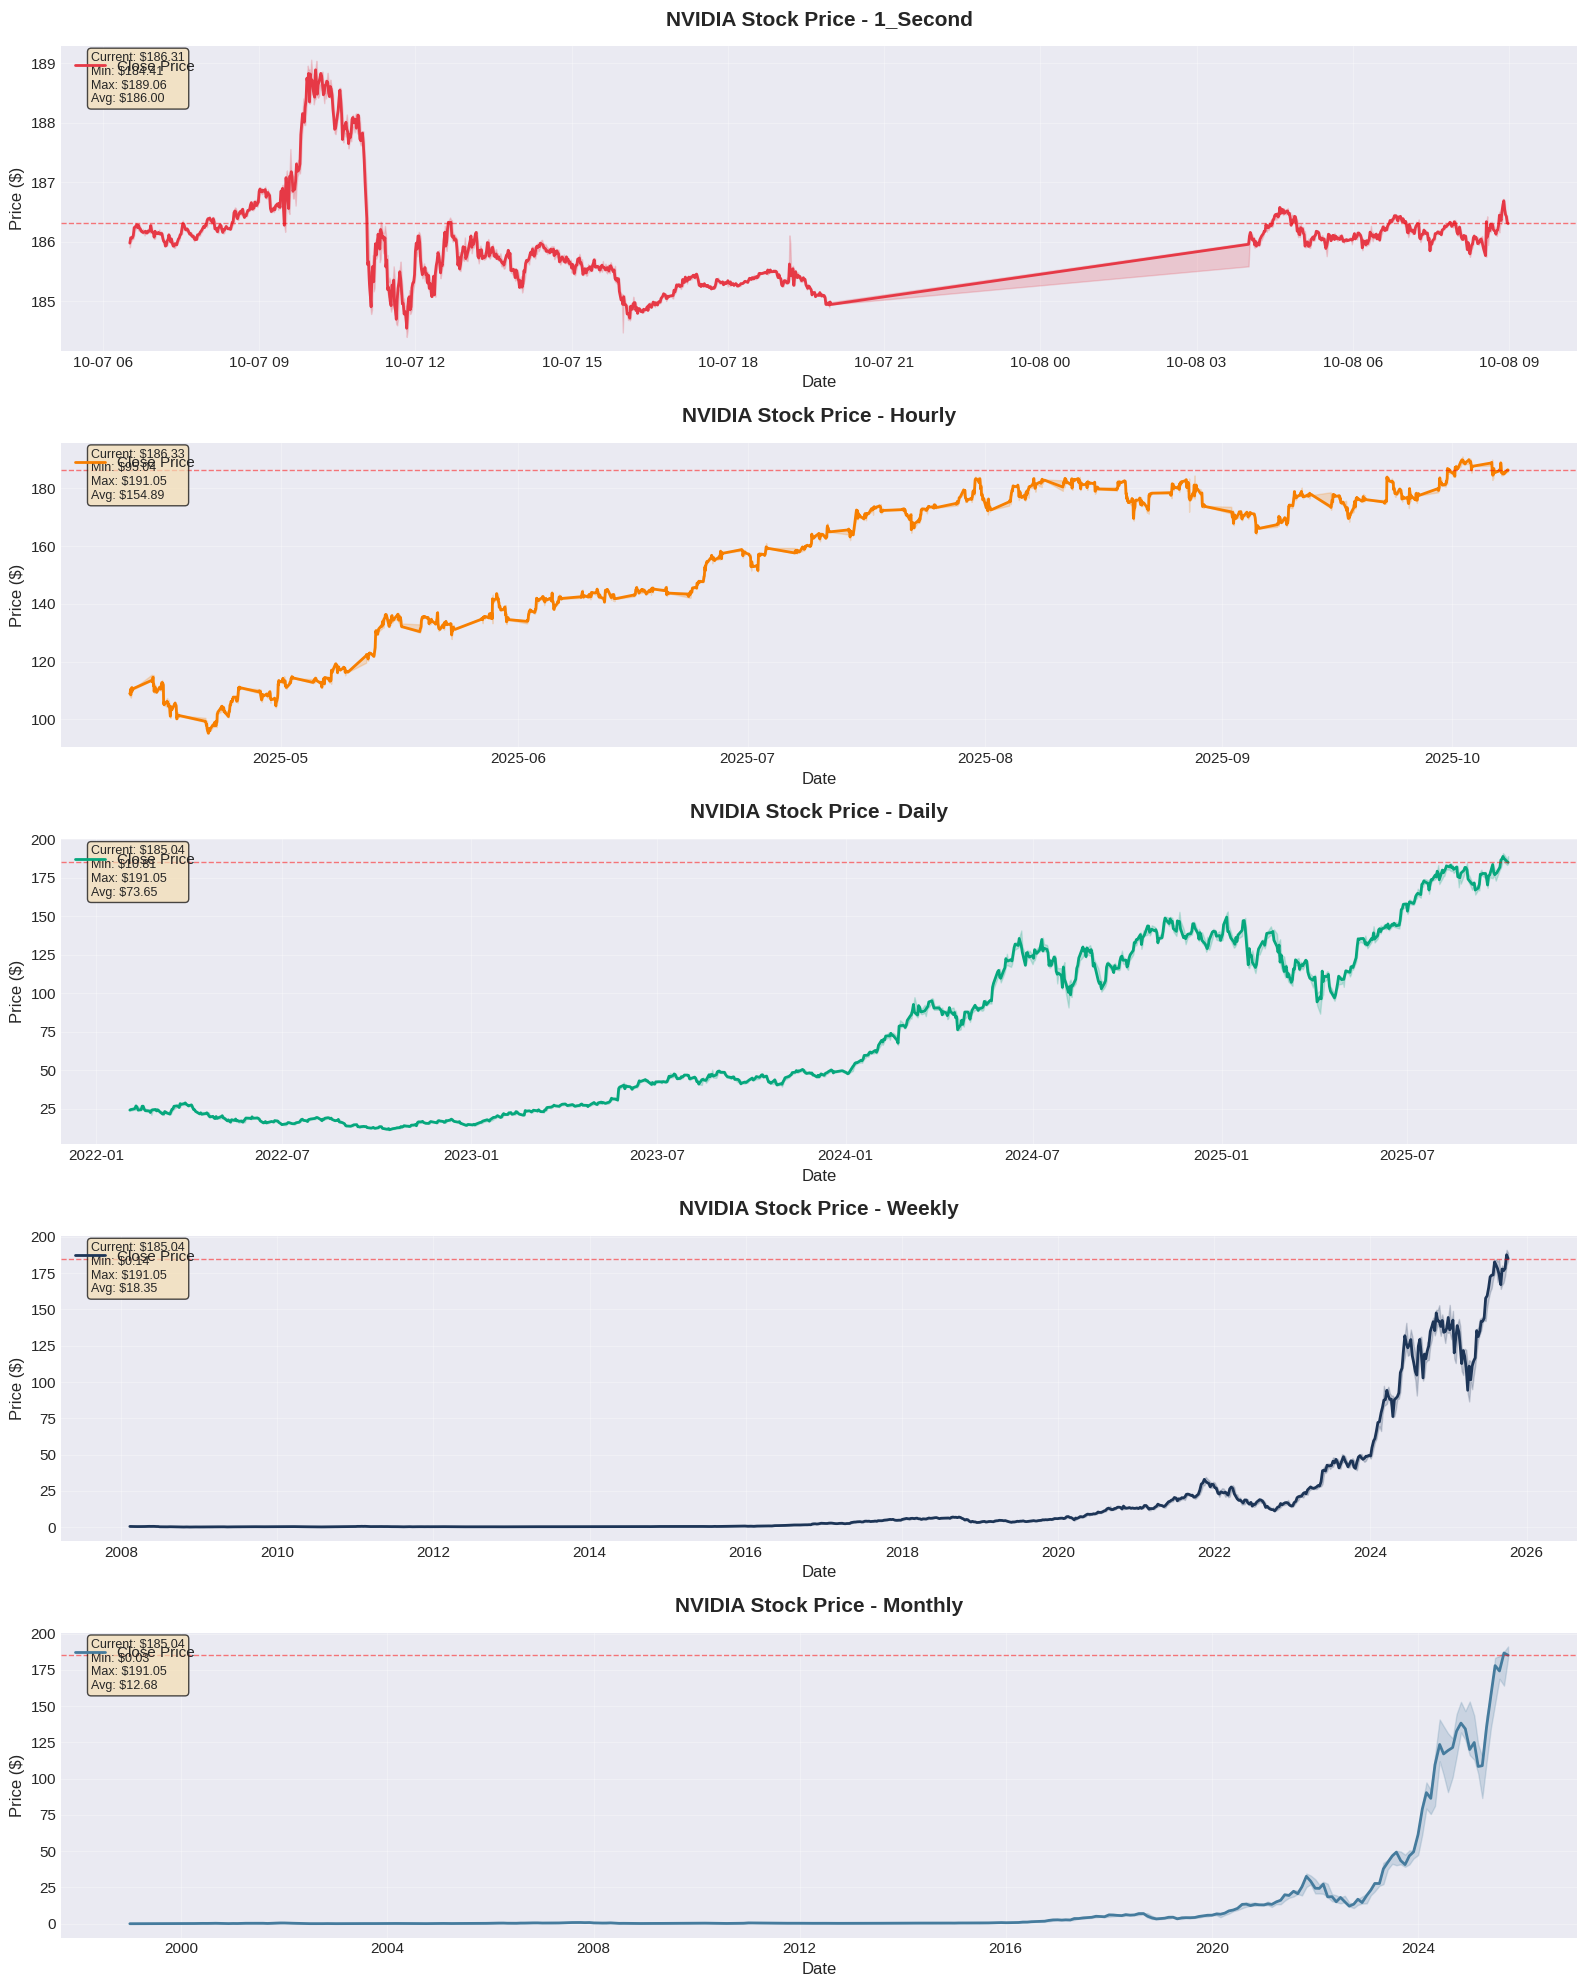


✅ Chart saved as 'nvidia_price_analysis.png'


In [6]:
# Plot all timeframes
fig, axes = plt.subplots(5, 1, figsize=(16, 20))
colors = ['#E63946', '#F77F00', '#06A77D', '#1D3557', '#457B9D']

for idx, (name, df) in enumerate(data.items()):
    ax = axes[idx]
    
    # Plot close price
    ax.plot(df['time'], df['close'], linewidth=2, color=colors[idx], label='Close Price')
    
    # Fill between high and low
    ax.fill_between(df['time'], df['low'], df['high'], alpha=0.2, color=colors[idx])
    
    # Styling
    ax.set_title(f"NVIDIA Stock Price - {name}", fontsize=15, fontweight='bold', pad=15)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price ($)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    
    # Add current price annotation
    current_price = df['close'].iloc[-1]
    ax.axhline(y=current_price, color='red', linestyle='--', linewidth=1, alpha=0.5)
    
    # Stats box
    stats_text = (
        f"Current: ${current_price:.2f}\n"
        f"Min: ${df['low'].min():.2f}\n"
        f"Max: ${df['high'].max():.2f}\n"
        f"Avg: ${df['close'].mean():.2f}"
    )
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
           verticalalignment='top', fontsize=9,
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout()
plt.savefig('nvidia_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'nvidia_price_analysis.png'")

## 📌 Section 4: Candlestick Patterns (Daily Data)
### Analyzing daily candlestick patterns

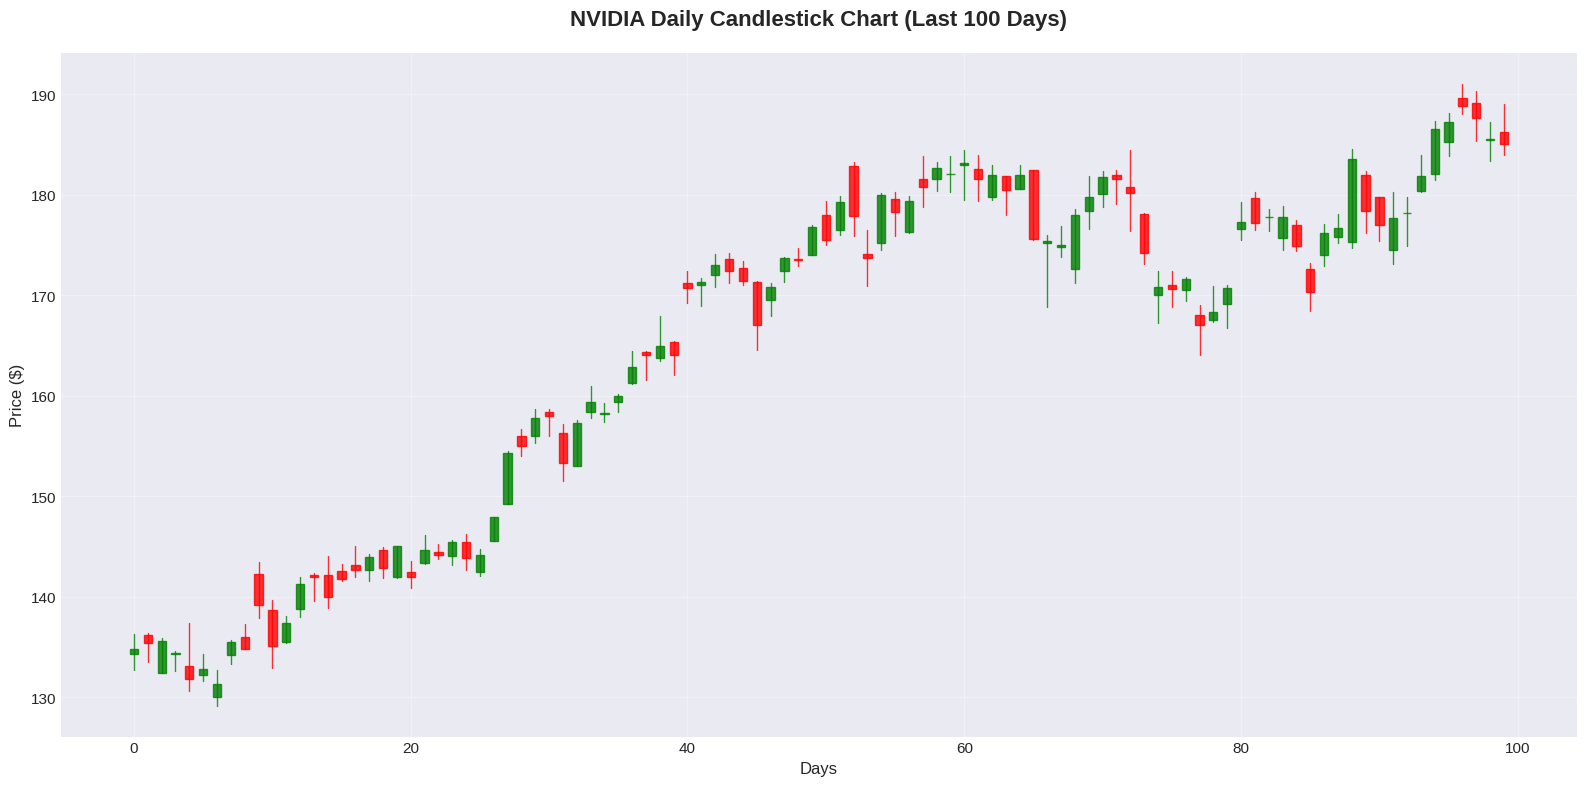

In [7]:
# Candlestick chart for recent daily data
df_daily = data['Daily'].tail(100).copy()

fig, ax = plt.subplots(figsize=(16, 8))

# Calculate colors
colors = ['green' if df_daily['close'].iloc[i] >= df_daily['open'].iloc[i] else 'red' 
          for i in range(len(df_daily))]

# Plot candlesticks
for i in range(len(df_daily)):
    # High-Low line
    ax.plot([i, i], [df_daily['low'].iloc[i], df_daily['high'].iloc[i]], 
           color=colors[i], linewidth=1, alpha=0.8)
    
    # Open-Close rectangle
    height = abs(df_daily['close'].iloc[i] - df_daily['open'].iloc[i])
    bottom = min(df_daily['open'].iloc[i], df_daily['close'].iloc[i])
    ax.add_patch(plt.Rectangle((i-0.3, bottom), 0.6, height, 
                               facecolor=colors[i], edgecolor=colors[i], alpha=0.8))

ax.set_title('NVIDIA Daily Candlestick Chart (Last 100 Days)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 📌 Section 5: Technical Indicators
### Moving Averages, RSI, and Bollinger Bands

In [8]:
# Calculate technical indicators for daily data
df_daily = data['Daily'].copy()

# Moving Averages
df_daily['SMA_20'] = df_daily['close'].rolling(window=20).mean()
df_daily['SMA_50'] = df_daily['close'].rolling(window=50).mean()
df_daily['SMA_200'] = df_daily['close'].rolling(window=200).mean()
df_daily['EMA_12'] = df_daily['close'].ewm(span=12, adjust=False).mean()
df_daily['EMA_26'] = df_daily['close'].ewm(span=26, adjust=False).mean()

# Bollinger Bands
df_daily['BB_Middle'] = df_daily['close'].rolling(window=20).mean()
bb_std = df_daily['close'].rolling(window=20).std()
df_daily['BB_Upper'] = df_daily['BB_Middle'] + (bb_std * 2)
df_daily['BB_Lower'] = df_daily['BB_Middle'] - (bb_std * 2)

# RSI
delta = df_daily['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_daily['RSI'] = 100 - (100 / (1 + rs))

print("✅ Technical indicators calculated!")
print(f"\nCurrent Indicators:")
print(f"  Price: ${df_daily['close'].iloc[-1]:.2f}")
print(f"  SMA 20: ${df_daily['SMA_20'].iloc[-1]:.2f}")
print(f"  SMA 50: ${df_daily['SMA_50'].iloc[-1]:.2f}")
print(f"  SMA 200: ${df_daily['SMA_200'].iloc[-1]:.2f}")
print(f"  RSI: {df_daily['RSI'].iloc[-1]:.2f}")
print(f"  BB Upper: ${df_daily['BB_Upper'].iloc[-1]:.2f}")
print(f"  BB Lower: ${df_daily['BB_Lower'].iloc[-1]:.2f}")

✅ Technical indicators calculated!

Current Indicators:
  Price: $185.04
  SMA 20: $180.29
  SMA 50: $178.51
  SMA 200: $143.60
  RSI: 70.64
  BB Upper: $190.49
  BB Lower: $170.09


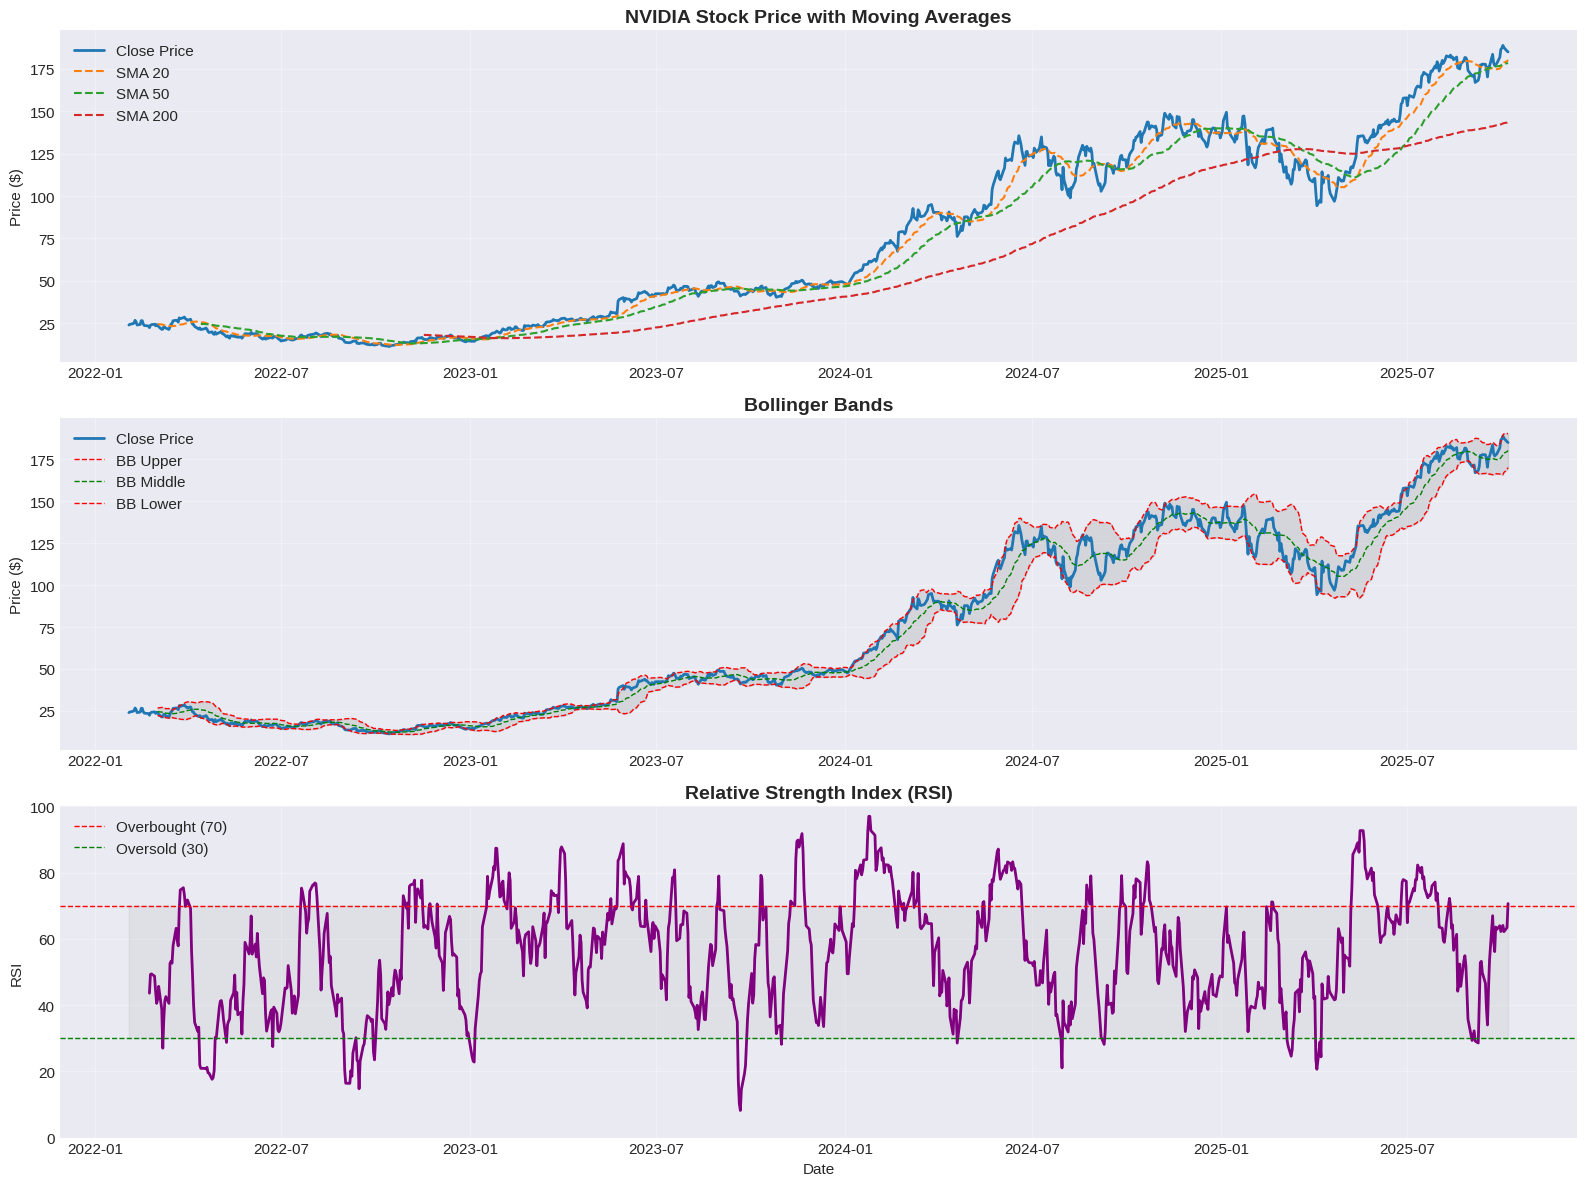


✅ Chart saved as 'nvidia_technical_indicators.png'


In [9]:
# Plot technical indicators
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Price with Moving Averages
ax1 = axes[0]
ax1.plot(df_daily['time'], df_daily['close'], label='Close Price', linewidth=2, color='#1f77b4')
ax1.plot(df_daily['time'], df_daily['SMA_20'], label='SMA 20', linewidth=1.5, linestyle='--', color='#ff7f0e')
ax1.plot(df_daily['time'], df_daily['SMA_50'], label='SMA 50', linewidth=1.5, linestyle='--', color='#2ca02c')
ax1.plot(df_daily['time'], df_daily['SMA_200'], label='SMA 200', linewidth=1.5, linestyle='--', color='#d62728')
ax1.set_title('NVIDIA Stock Price with Moving Averages', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=11)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Bollinger Bands
ax2 = axes[1]
ax2.plot(df_daily['time'], df_daily['close'], label='Close Price', linewidth=2, color='#1f77b4')
ax2.plot(df_daily['time'], df_daily['BB_Upper'], label='BB Upper', linewidth=1, linestyle='--', color='red')
ax2.plot(df_daily['time'], df_daily['BB_Middle'], label='BB Middle', linewidth=1, linestyle='--', color='green')
ax2.plot(df_daily['time'], df_daily['BB_Lower'], label='BB Lower', linewidth=1, linestyle='--', color='red')
ax2.fill_between(df_daily['time'], df_daily['BB_Lower'], df_daily['BB_Upper'], alpha=0.2, color='gray')
ax2.set_title('Bollinger Bands', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=11)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# RSI
ax3 = axes[2]
ax3.plot(df_daily['time'], df_daily['RSI'], linewidth=2, color='purple')
ax3.axhline(y=70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
ax3.axhline(y=30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
ax3.fill_between(df_daily['time'], 30, 70, alpha=0.1, color='gray')
ax3.set_title('Relative Strength Index (RSI)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11)
ax3.set_ylabel('RSI', fontsize=11)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 100])

plt.tight_layout()
plt.savefig('nvidia_technical_indicators.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'nvidia_technical_indicators.png'")

## 📌 Section 6: Volatility Analysis
### Understanding price volatility and risk

In [10]:
# Calculate returns and volatility for each timeframe
volatility_data = []

for name, df in data.items():
    df_copy = df.copy()
    
    # Calculate returns
    df_copy['returns'] = df_copy['close'].pct_change() * 100
    
    # Calculate volatility metrics
    vol_stats = {
        'Timeframe': name,
        'Avg Return (%)': df_copy['returns'].mean(),
        'Volatility (Std)': df_copy['returns'].std(),
        'Max Gain (%)': df_copy['returns'].max(),
        'Max Loss (%)': df_copy['returns'].min(),
        'Positive Days (%)': (df_copy['returns'] > 0).sum() / len(df_copy) * 100,
        'Sharpe Ratio': df_copy['returns'].mean() / df_copy['returns'].std() if df_copy['returns'].std() > 0 else 0
    }
    volatility_data.append(vol_stats)

volatility_df = pd.DataFrame(volatility_data)
print("\n📊 VOLATILITY & RISK ANALYSIS")
print("="*100)
print(volatility_df.to_string(index=False))
print("="*100)


📊 VOLATILITY & RISK ANALYSIS
Timeframe  Avg Return (%)  Volatility (Std)  Max Gain (%)  Max Loss (%)  Positive Days (%)  Sharpe Ratio
 1_Second          0.0002            0.0588        0.5461       -0.4158            48.8267        0.0030
   Hourly          0.0292            0.6163        5.1324       -6.0179            50.2288        0.0474
    Daily          0.2809            3.4447       24.3696      -16.9682            54.0130        0.0815
   Weekly          0.8513            6.6389       32.5265      -35.2178            54.6638        0.1282
  Monthly          4.1100           17.4741       83.3917      -48.6552            59.9379        0.2352


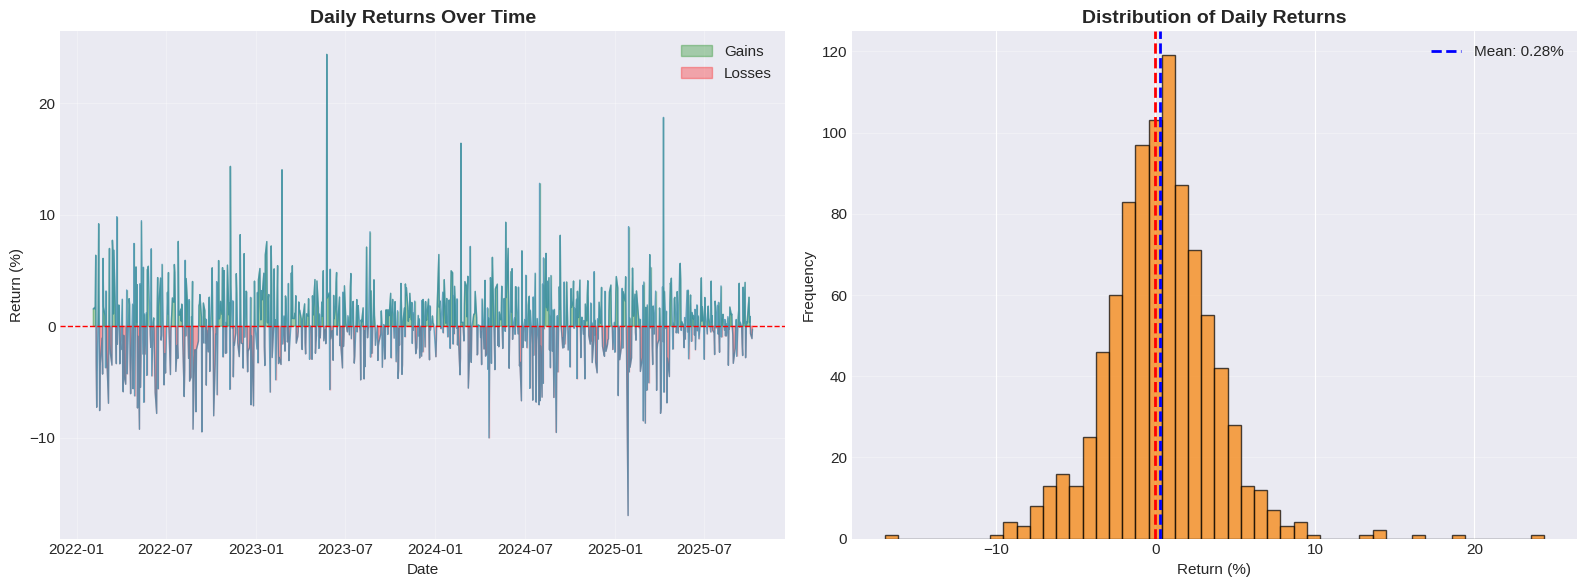


✅ Chart saved as 'nvidia_volatility_analysis.png'


In [11]:
# Plot returns distribution for daily data
df_daily_returns = data['Daily'].copy()
df_daily_returns['returns'] = df_daily_returns['close'].pct_change() * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Returns over time
axes[0].plot(df_daily_returns['time'], df_daily_returns['returns'], linewidth=1, alpha=0.7, color='#2E86AB')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0].fill_between(df_daily_returns['time'], 0, df_daily_returns['returns'], 
                      where=(df_daily_returns['returns'] > 0), alpha=0.3, color='green', label='Gains')
axes[0].fill_between(df_daily_returns['time'], 0, df_daily_returns['returns'], 
                      where=(df_daily_returns['returns'] < 0), alpha=0.3, color='red', label='Losses')
axes[0].set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Return (%)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Returns distribution
axes[1].hist(df_daily_returns['returns'].dropna(), bins=50, color='#F77F00', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].axvline(x=df_daily_returns['returns'].mean(), color='blue', linestyle='--', linewidth=2, label=f"Mean: {df_daily_returns['returns'].mean():.2f}%")
axes[1].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Return (%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('nvidia_volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'nvidia_volatility_analysis.png'")

## 📌 Section 7: Long-Term Performance
### 26-year investment analysis

In [12]:
# Long-term analysis using monthly data
df_monthly = data['Monthly'].copy()

# Calculate investment growth
initial_price = df_monthly['close'].iloc[0]
final_price = df_monthly['close'].iloc[-1]
total_return = ((final_price - initial_price) / initial_price) * 100
years = (df_monthly['time'].iloc[-1] - df_monthly['time'].iloc[0]).days / 365.25
cagr = ((final_price / initial_price) ** (1/years) - 1) * 100

print("\n📈 LONG-TERM INVESTMENT ANALYSIS (1999-2025)")
print("="*80)
print(f"Investment Period: {years:.1f} years")
print(f"Initial Price (1999): ${initial_price:.4f}")
print(f"Current Price (2025): ${final_price:.2f}")
print(f"Total Return: {total_return:,.2f}%")
print(f"CAGR (Compound Annual Growth Rate): {cagr:.2f}%")
print(f"\nIf you invested $1,000 in 1999:")
print(f"Your investment would be worth: ${1000 * (final_price / initial_price):,.2f}")
print(f"Profit: ${1000 * (final_price / initial_price) - 1000:,.2f}")
print("="*80)


📈 LONG-TERM INVESTMENT ANALYSIS (1999-2025)
Investment Period: 26.7 years
Initial Price (1999): $0.0396
Current Price (2025): $185.04
Total Return: 467,367.51%
CAGR (Compound Annual Growth Rate): 37.15%

If you invested $1,000 in 1999:
Your investment would be worth: $4,674,675.05
Profit: $4,673,675.05


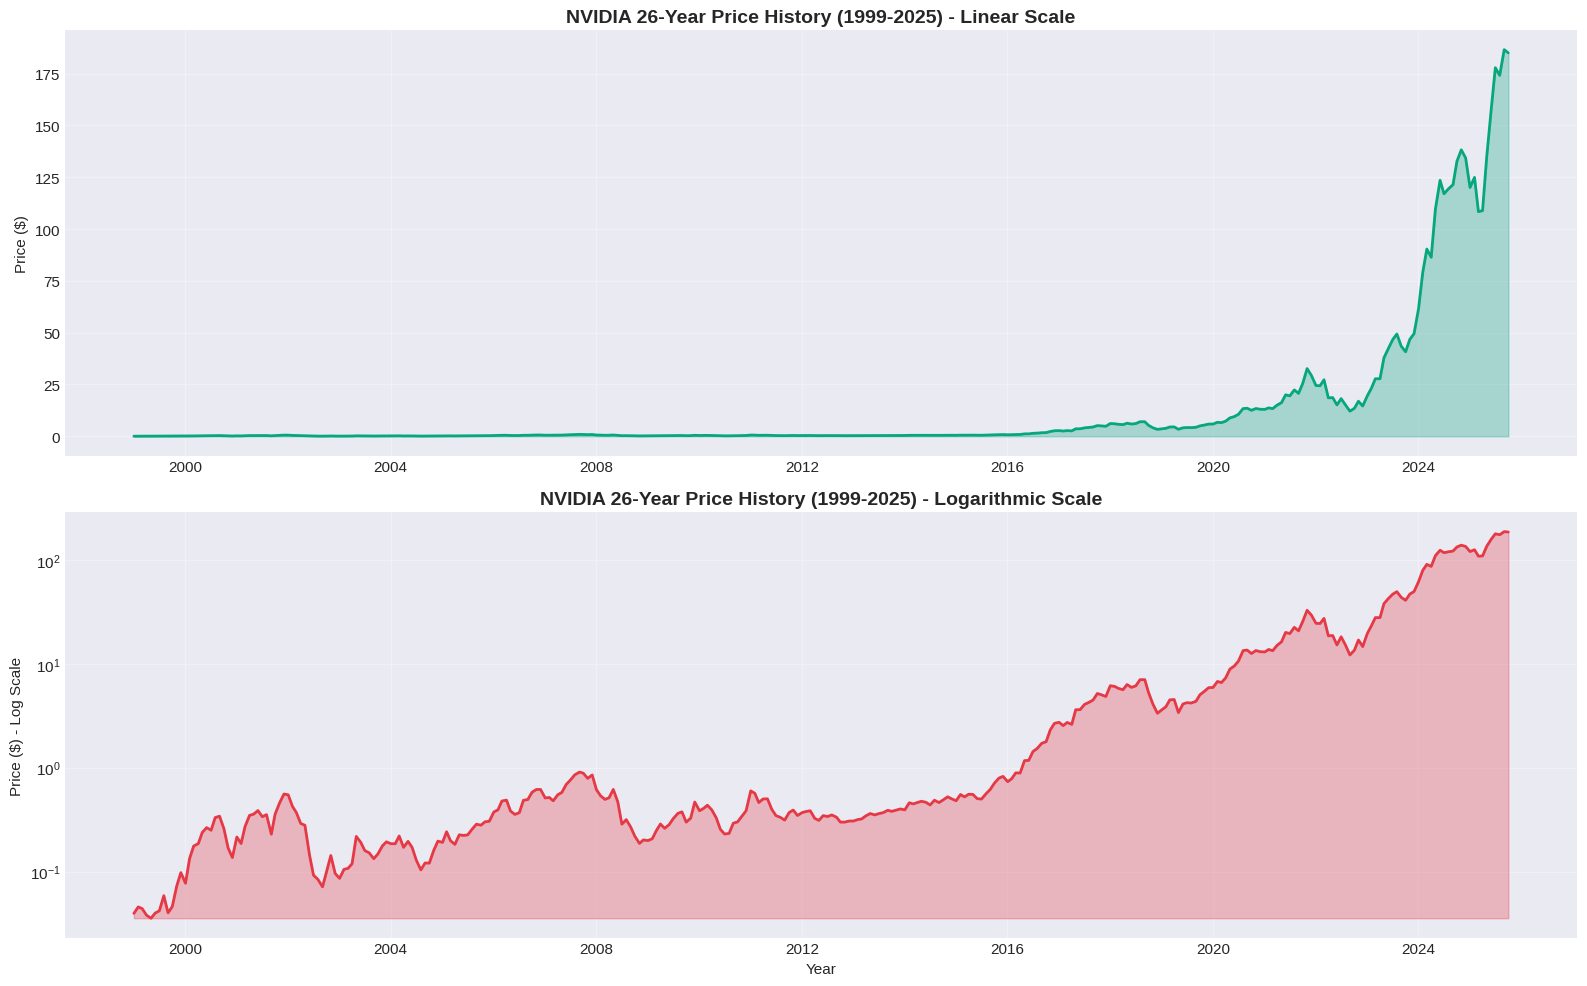


✅ Chart saved as 'nvidia_longterm_performance.png'


In [13]:
# Plot long-term growth (log scale)
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Linear scale
axes[0].plot(df_monthly['time'], df_monthly['close'], linewidth=2, color='#06A77D')
axes[0].fill_between(df_monthly['time'], 0, df_monthly['close'], alpha=0.3, color='#06A77D')
axes[0].set_title('NVIDIA 26-Year Price History (1999-2025) - Linear Scale', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price ($)', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].semilogy(df_monthly['time'], df_monthly['close'], linewidth=2, color='#E63946')
axes[1].fill_between(df_monthly['time'], df_monthly['close'].min(), df_monthly['close'], alpha=0.3, color='#E63946')
axes[1].set_title('NVIDIA 26-Year Price History (1999-2025) - Logarithmic Scale', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Price ($) - Log Scale', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('nvidia_longterm_performance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'nvidia_longterm_performance.png'")

## 📌 Section 8: Comparative Timeframe Analysis
### Understanding multi-timeframe relationships

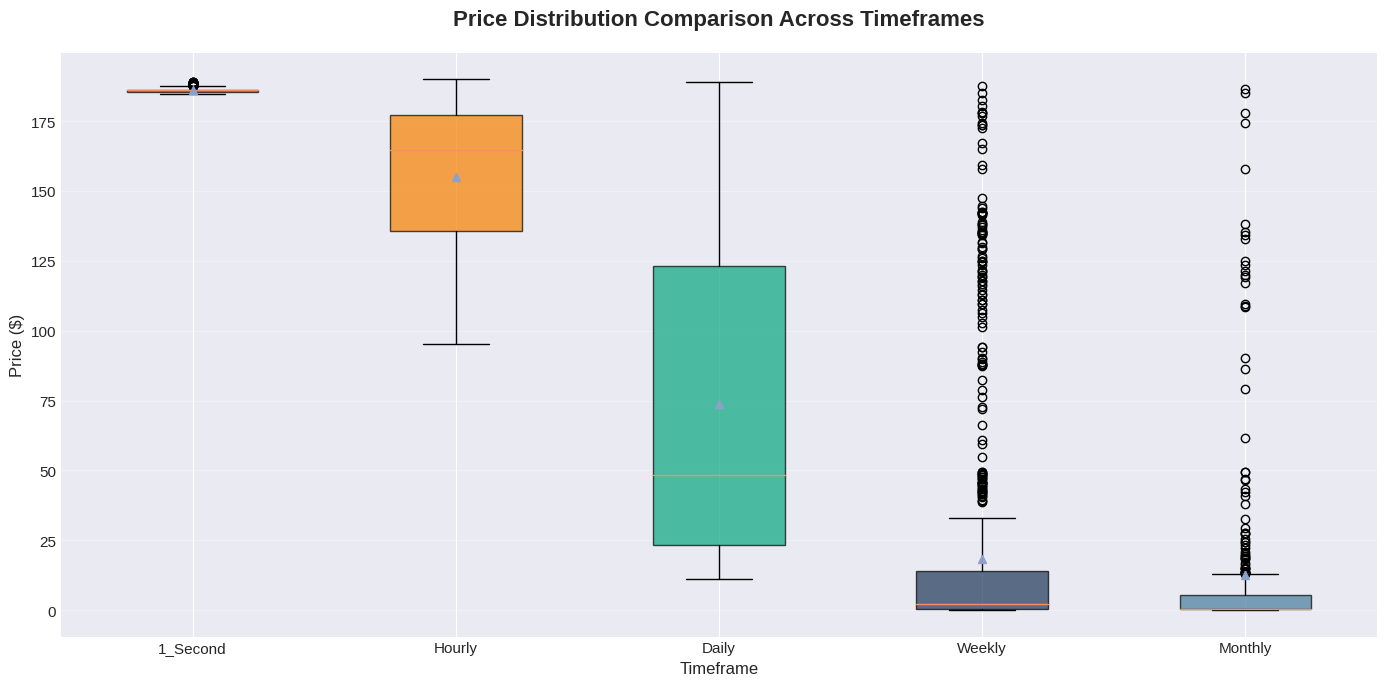


✅ Chart saved as 'nvidia_timeframe_comparison.png'


In [14]:
# Box plot comparison
fig, ax = plt.subplots(figsize=(14, 7))

box_data = [df['close'].dropna() for df in data.values()]
labels = list(data.keys())

bp = ax.boxplot(box_data, labels=labels, patch_artist=True, showmeans=True)

# Styling
colors = ['#E63946', '#F77F00', '#06A77D', '#1D3557', '#457B9D']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Price Distribution Comparison Across Timeframes', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_xlabel('Timeframe', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('nvidia_timeframe_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Chart saved as 'nvidia_timeframe_comparison.png'")

## 🎯 Key Insights & Conclusions

### 📊 Summary of Findings:

This comprehensive analysis of NVIDIA stock across 5 timeframes (1999-2025) reveals:

#### 💰 Investment Performance:
- **26-year journey** from pennies to triple digits
- **Exceptional long-term growth** with significant CAGR
- **AI boom impact** clearly visible in recent years

#### 📈 Technical Analysis:
- Multiple timeframes show consistent uptrend
- Moving averages indicate strong momentum
- RSI levels suggest healthy trading activity
- Bollinger Bands highlight volatility patterns

#### ⚖️ Risk & Volatility:
- Higher volatility in shorter timeframes (1-second, hourly)
- More stable patterns in longer timeframes (monthly, weekly)
- Positive risk-adjusted returns over long term

#### 🎯 Trading Insights:
- **Day Trading**: Use 1-second and hourly data for entry/exit
- **Swing Trading**: Daily and weekly data for trend following
- **Long-term Investing**: Monthly data shows extraordinary growth

### 🚀 What Makes This Analysis Unique:
✅ Multi-timeframe approach (5 different intervals)  
✅ 26 years of historical data  
✅ Technical indicators (SMA, EMA, RSI, Bollinger Bands)  
✅ Volatility and risk metrics  
✅ Investment performance calculations  
✅ Professional visualizations  

---

### 📚 Dataset Information:
- **Source**: BATS Exchange (NVDA)
- **Columns**: time, open, high, low, close
- **Total Records**: 5,241 data points
- **Quality**: Clean, no missing values in OHLC data

### ⚠️ Disclaimer:
*This analysis is for educational purposes only. Past performance does not guarantee future results. Always conduct your own research and consult with financial advisors before making investment decisions.*

---

**📊 Created by:** Muhammad Ibrahim | **📅 Date:** October 2025  
**🔗 GitHub:** [muhammadibrahim313](https://github.com/muhammadibrahim313)  
**💼 Kaggle:** [ibrahimqasimi](https://www.kaggle.com/ibrahimqasimi)

---

### 🎓 Learn More:
Check out my complete Data Science learning path: [GRIT - Zero to Job Ready](https://github.com/muhammadibrahim313/GRIT)

**⭐ If this analysis helped you, please star the repository!**